In [30]:
%pip install jupyter pandas numpy matplotlib seaborn scikit-learn tensorflow xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from xgboost import XGBRegressor

Note: you may need to restart the kernel to use updated packages.


### Conjunto de datos limpio 

In [31]:
df = pd.read_csv('data/avocado_cleaned.csv')

x = df.drop(columns=['AveragePrice'])
y = df['AveragePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Regresión Lineal

In [32]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

### Random Forest Regressor


In [33]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Red neuronal

In [34]:
nn = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn.compile(optimizer='adam', loss='mse')
nn.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn.predict(x_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

/home/esmeralda/Documentos/Universidad/Ciencia_datos/avocado_prices/avocado_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### Gradient Boosting Regressor (XGBoost)



In [35]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

### Support Vector Reggressor (SVR)

In [36]:
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

### Guardar métricas 

In [ ]:
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network', 'XGBoost', 'SVR'],
    'MSE': [mse_lr, mse_rf, mse_nn, mse_xgb, mse_svr],
    'R2 Score': [r2_lr, r2_rf, r2_nn, r2_xgb, r2_svr]
})
metrics.to_csv('data/model_metrics.csv', index=False)

### Análisis del rendimiento del modelo

In [38]:
print(f'Linear Regression - MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}')
print(f'Random Forest - MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}')
print(f'Neural Network - MSE: {mse_nn:.4f}, R2: {r2_nn:.4f}')
print(f'XGBoost - MSE: {mse_xgb:.4f}, R2: {r2_xgb:.4f}')
print(f'SVR - MSE: {mse_svr:.4f}, R2: {r2_svr:.4f}')

Linear Regression - MSE: 0.5498, R2: 0.4566
Random Forest - MSE: 0.2120, R2: 0.7905
Neural Network - MSE: 0.6297, R2: 0.3776
XGBoost - MSE: 0.2045, R2: 0.7979
SVR - MSE: 1.0082, R2: 0.0035


### Comparación
Los métodos de conjunto (Random Forest, XGBoost) suelen superar a otros debido a su capacidad para capturar patrones no lineales y manejar datos de alta dimensión. La regresión lineal presenta dificultades con las no linealidades, las redes neuronales están limitadas por el tamaño del conjunto de datos y la falta de ajuste, y la SVR puede tener un rendimiento inferior sin una optimización exhaustiva de hiperparámetros.

En este caso, la clasificación solo es posible si se discretiza el precio promedio en categorías, pero se pierde precisión. Por otro lado, el agrupamiento puede segmentar los datos, pero no está supervisado y no predice el precio promedio directamente.

### Predicciones gráficas frente a datos reales

Text(0, 0.5, 'Valor Predicho')

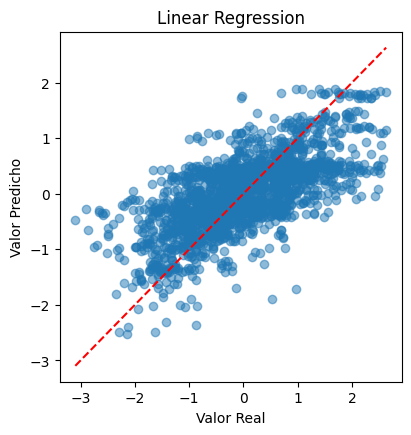

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

Text(0, 0.5, 'Valor Predicho')

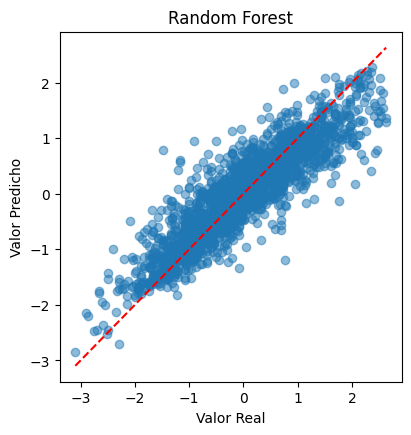

In [40]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

Text(0, 0.5, 'Valor Predicho')

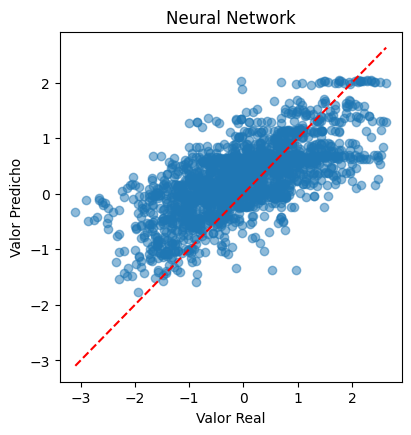

In [41]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Neural Network')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

Text(0, 0.5, 'Valor Predicho')

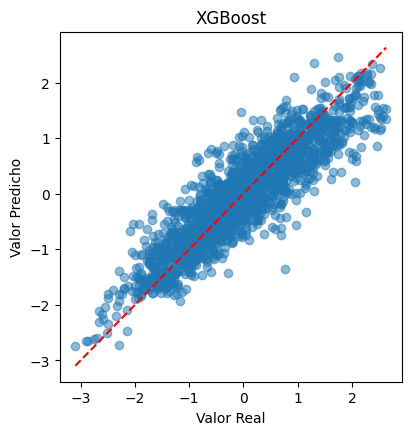

In [43]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('XGBoost')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

Text(0, 0.5, 'Valor Predicho')

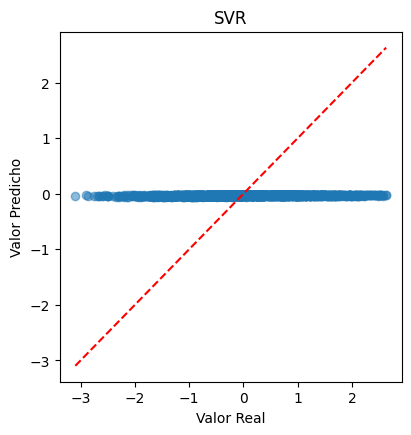

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('SVR')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

plt.tight_layout()
plt.savefig('data/model_predictions.png')
plt.show()